In [1]:
%pip install transformers torch pandas scikit-learn matplotlib
%pip install accelerate bitsandbytes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 MB 13.1 MB/s eta 0:00:00:00:0100:01


In [ ]:
import pandas as pd
import torch
from transformers import pipeline, set_seed, AutoTokenizer, AutoModelForCausalLM

MODELE_NOM = "mistralai/Mistral-7B-Instruct-v0.2"
tokenizer = AutoTokenizer.from_pretrained(MODELE_NOM)

model = AutoModelForCausalLM.from_pretrained(
	MODELE_NOM,
	load_in_4bit=True,
	dtype=torch.float16,
	device_map="auto"
)

#Pipeline de génération
generator = pipeline(
	'text-generation', 
	model=model, 
	tokenizer=tokenizer
)

set_seed(42)
print("Modèle Mistral-7B-Instruct chargé en 4-bit.")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/596 [00:00<?, ?B/s]

The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.


model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.94G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.54G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

Device set to use cuda:0


Modèle Mistral-7B-Instruct chargé en 4-bit.


In [ ]:
import pandas as pd

hp_questions_data = [
	{
		"id": 1,
		"question": "Quelle est la tâche de la première année que Harry Potter réussit, impliquant un sortilège de lévitation ?",
		"reponse_reference": "**Clé Volante** - Premier obstacle majeur de Poudlard où Harry doit utiliser un balai pour capturer une clé enchantée parmi une nuée d'oiseaux-clés."
	},
	{
		"id": 2,
		"question": "Expliquez brièvement le rôle du Retourneur de Temps et pourquoi il a été utilisé dans Le Prisonnier d'Azkaban.",
		"reponse_reference": "**Retourneur de Temps** - Dispositif magique en forme de sablier permettant de voyager dans le passé, utilisé par Harry et Hermione pour sauver Buckbeak et Sirius Black."
	},
	{
		"id": 3,
		"question": "Quels sont les quatre objets que Tom Jedusor a transformés en Horcruxes avant le Serpent de Salazar Serpentard ?",
		"reponse_reference": "**Horcruxes** - Objets de magie noire contenant une partie de l'âme de Voldemort, incluant le journal de Jedusor, la bague des Gaunt, le médaillon de Serpentard et la coupe de Poufsouffle."
	},
	{
		"id": 4,
		"question": "Outre le Nimbus 2000, citez un balai magique notable utilisé par Harry Potter et expliquez son avantage.",
		"reponse_reference": "**Éclair de Feu** - Balai de course de niveau professionnel offrant une accélération de 0 à 240 km/h en dix secondes, offert à Harry par Sirius Black."
	},
	{
		"id": 5,
		"question": "Décrivez brièvement la relation entre le professeur Severus Rogue et Lily Evans (la mère d'Harry).",
		"reponse_reference": "**Amitié d'enfance** - Relation profonde marquée par l'amour non réciproque de Rogue pour Lily, expliquant sa loyauté secrète envers l'Ordre du Phénix et sa protection envers Harry."
	},
	{
		"id": 6,
		"question": "Quel est le rôle principal de l'Ordre du Phénix et qui en était le chef à l'origine ?",
		"reponse_reference": "**Ordre du Phénix** - Organisation secrète fondée et dirigée par Albus Dumbledore pour s'opposer à Lord Voldemort et à ses Mangemorts."
	},
	{
		"id": 7,
		"question": "Quel est le nom du sortilège impardonnable utilisé pour torturer la victime, et qui l'a souvent subi parmi les personnages principaux ?",
		"reponse_reference": "**Doloris** - Sortilège de torture (Crucio) infligeant une douleur physique extrême, utilisé par Bellatrix Lestrange sur les parents de Neville Londubat jusqu'à leur folie."
	},
	{
		"id": 8,
		"question": "Qu'est-ce que le Miroir du Riséd et quelle est l'avertissement essentiel que Dumbledore donne à son sujet ?",
		"reponse_reference": "**Miroir du Riséd** - Artefact magique révélant le désir le plus profond du cœur, au sujet duquel Dumbledore prévient qu'il ne faut pas se perdre dans la rêverie au détriment de la réalité."
	},
	{
		"id": 9,
		"question": "Citez et décrivez brièvement le rôle de l'animal de compagnie de Hagrid qui est une araignée géante.",
		"reponse_reference": "**Aragog** - Acromantule élevée par Hagrid dans la Forêt Interdite, capable de parler et réputée pour être le chef d'une vaste colonie d'araignées géantes."
	},
	{
		"id": 10,
		"question": "Quelle est la substance magique essentielle qui protège la Pierre Philosophale et comment est-elle créée ?",
		"reponse_reference": "**Élixir de Vie** - Substance produite par la Pierre Philosophale de Nicolas Flamel qui confère l'immortalité tant que le sorcier en consomme régulièrement."
	},
	{
		"id": 11,
		"question": "Qui est le fondateur de la maison Poufsouffle et quelle était sa philosophie pour accepter les élèves ?",
		"reponse_reference": "**Helga Poufsouffle** - Fondatrice de Poudlard privilégiant la loyauté et le travail acharné, célèbre pour accepter tous les élèves sans distinction de dons particuliers."
	},
	{
		"id": 12,
		"question": "Quel est le sortilège utilisé pour générer un Patronus, et quelle condition émotionnelle est indispensable à sa réussite ?",
		"reponse_reference": "**Expecto Patronum** - Charme de protection avancé nécessitant de se concentrer sur un souvenir extrêmement heureux pour matérialiser une entité protectrice face aux Détraqueurs."
	},
	{
		"id": 13,
		"question": "Expliquez la signification du statut de sang de Né-Moldu (Muggle-born) dans le monde sorcier.",
		"reponse_reference": "**Né-Moldu** - Terme désignant un sorcier issu de deux parents dépourvus de pouvoirs magiques, souvent discriminé par les partisans de la pureté du sang."
	},
	{
		"id": 14,
		"question": "Quel est le rôle de la Pensine (Penseive) et quel est l'avantage de l'utiliser ?",
		"reponse_reference": "**Pensine** - Bassin en pierre permettant de décharger ses souvenirs pour les examiner de manière objective et libérer l'esprit d'un surplus d'informations."
	},
	{
		"id": 15,
		"question": "Qui sont les Maraudeurs, et quel est l'objet magique qu'ils ont créé ensemble ?",
		"reponse_reference": "**Maraudeurs** - Groupe composé de James Potter, Sirius Black, Remus Lupin et Peter Pettigrow, créateurs de la Carte du Maraudeur révélant les secrets de Poudlard."
	}
]

df_hp = pd.DataFrame(hp_questions_data)
print(f"Dataset créé avec {len(df_hp)} questions. Prêt pour l'expérimentation.")
print(df_hp[['id', 'question', 'reponse_reference']].head())

Dataset créé avec 15 questions. Prêt pour l'expérimentation.
   id                                           question  \
0   1  Quelle est la tâche de la première année que H...   
1   2  Expliquez brièvement le rôle du Retourneur de ...   
2   3  Quels sont les quatre objets que Tom Jedusor a...   
3   4  Outre le Nimbus 2000, citez un balai magique n...   
4   5  Décrivez brièvement la relation entre le profe...   

                                   reponse_reference  
0  **Clé Volante** - Premier obstacle majeur de P...  
1  **Retourneur de Temps** - Dispositif magique e...  
2  **Horcruxes** - Objets de magie noire contenan...  
3  **Éclair de Feu** - Balai de course de niveau ...  
4  **Amitié d'enfance** - Relation profonde marqu...  


In [11]:
#Fonctions pour construire les Prompts

def formater_prompt_mistral(prompt_utilisateur: str) -> str:
	"""Applique le format d'instruction strict de Mistral."""
	#format : <s>[INST] Instruction [/INST]
	return f"<s>[INST] {prompt_utilisateur} [/INST]"

In [4]:
def creer_prompt_zero_shot(question_actuelle: str) -> str:
	"""Crée un prompt Zero-Shot."""
	
	prompt_utilisateur = (
		f"Question: {question_actuelle}\n"
		f"Réponse:"
	)
	
	return formater_prompt_mistral(prompt_utilisateur)

In [5]:
def creer_prompt_one_shot(question_actuelle: str, df_data: pd.DataFrame) -> str:
	"""Crée un prompt One-Shot en utilisant un exemple aléatoire du DataFrame."""
	
	df_potentiel = df_data[df_data['question'] != question_actuelle]
	
	exemple = df_potentiel.sample(n=1).iloc[0]
	
	exemples_prompt = (
		f"Question: {exemple['question']}\n"
		f"Réponse: {exemple['reponse_reference']}\n\n"
	)
	
	prompt_utilisateur = (
		f"--- Exemple de Format ---\n"
		f"{exemples_prompt}"
		f"--- Fin de l'Exemple ---\n\n"
		f"Question: {question_actuelle}\n"
		f"Réponse:"
	)
	
	return formater_prompt_mistral(prompt_utilisateur)

In [6]:
def creer_prompt_few_shot(question_actuelle: str, df_data: pd.DataFrame, nb_exemples: int = 3) -> str:
	"""Crée un prompt Few-Shot en utilisant N exemples aléatoires du DataFrame."""
	
	df_potentiel = df_data[df_data['question'] != question_actuelle]
	
	exemples = df_potentiel.sample(n=nb_exemples)
	
	exemples_prompt = ""
	for index, row in exemples.iterrows():
		exemples_prompt += (
			f"Question: {row['question']}\n"
			f"Réponse: {row['reponse_reference']}\n\n"
		)
		
	prompt_utilisateur = (
		f"--- Exemples de Format ---\n"
		f"{exemples_prompt}"
		f"--- Fin des Exemples ---\n\n"
		f"Question: {question_actuelle}\n"
		f"Réponse:"
	)
	
	return formater_prompt_mistral(prompt_utilisateur)

In [ ]:
import re

def evaluation_hybride(reponse_llm, reponse_ref):
	#Jaccard
	def tokenize(text):
		return set(re.sub(r'[^\w\s]', '', text.lower()).split())
	
	set_llm = tokenize(reponse_llm)
	set_ref = tokenize(reponse_ref)
	
	jaccard = 0.0
	if set_ref:
		intersection = set_llm.intersection(set_ref)
		union = set_llm.union(set_ref)
		jaccard = len(intersection) / len(union) if union else 0
	
	#Style
	style_score = 0

	if reponse_llm.strip().startswith("**"):
		style_score += 0.5

	if " - " in reponse_llm:
		style_score += 0.5
		
	return (jaccard * 0.7) + (style_score * 0.3)

In [18]:
# Cellule : Définition des 5 profils de tests
params_tests = [
	{"temp": 1.0, "top_p": 1.0, "top_k": 0, "sampling": False, "label": "1. Greedy (Strict)"},
	{"temp": 0.1, "top_p": 0.9, "top_k": 40, "sampling": True,  "label": "2. Déterministe (0.1)"},
	{"temp": 0.7, "top_p": 0.9, "top_k": 50, "sampling": True,  "label": "3. Équilibré (0.7)"},
	{"temp": 1.0, "top_p": 0.95, "top_k": 100, "sampling": True, "label": "4. Créatif (1.0)"},
	{"temp": 1.5, "top_p": 1.0, "top_k": 200, "sampling": True,  "label": "5. Aléatoire (1.5)"}
]

In [ ]:
resultats_finaux = []
approches = ["zero-shot", "one-shot", "few-shot"]

#Test sur 5 dernières questions du dataset
questions_test = df_hp.tail(5)

print(f"Lancement de {len(questions_test) * len(approches) * len(params_tests)} tests...")

for _, row in questions_test.iterrows():
	for approche in approches:
		# Choix de la fonction de prompt
		if approche == "zero-shot":
			prompt = creer_prompt_zero_shot(row['question'])
		elif approche == "one-shot":
			prompt = creer_prompt_one_shot(row['question'], df_hp)
		else:
			prompt = creer_prompt_few_shot(row['question'], df_hp, 3)
			
		for p in params_tests:
			output = generator(
				prompt, 
				temperature=p['temp'], 
				top_p=p['top_p'], 
				top_k=p['top_k'], 
				do_sample=p['sampling'], 
				max_new_tokens=100, 
				return_full_text=False
			)[0]['generated_text']
			
			# Nettoyage
			reponse_propre = output.split("[/INST]")[-1].strip()
			
			# Évaluation avec la nouvelle fonction hybride
			score = evaluation_hybride(reponse_propre, row['reponse_reference'])
			
			resultats_finaux.append({
				"Question_ID": row['id'],
				"Approche": approche,
				"Config": p['label'],
				"Score": score,
				"Reponse": reponse_propre
			})

df_final = pd.DataFrame(resultats_finaux)
print("Expérimentation terminée.")

The following generation flags are not valid and may be ignored: ['top_k']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Lancement de 75 tests...


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for o

Expérimentation terminée.


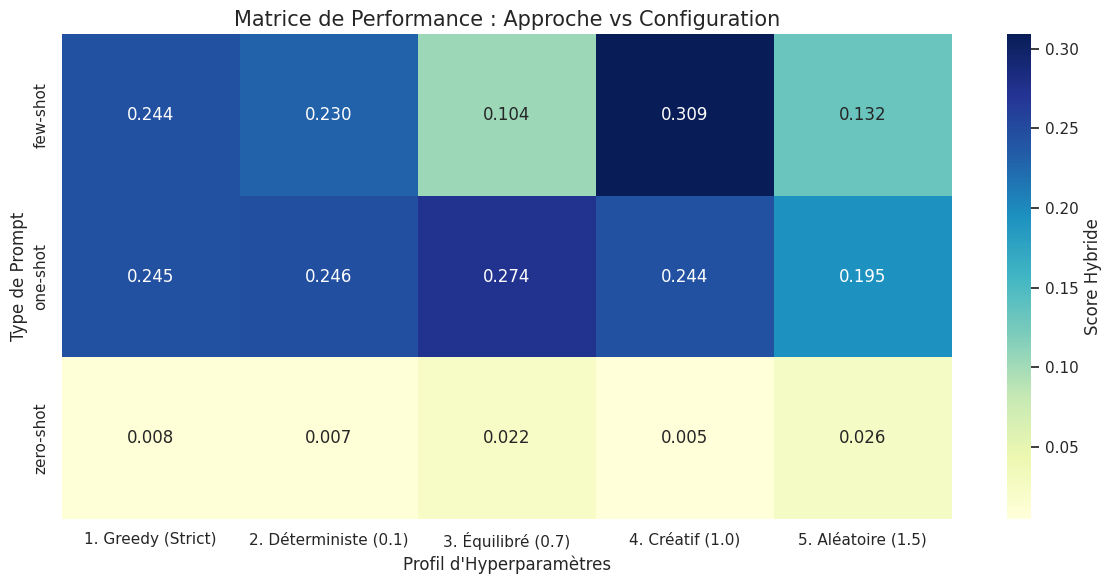

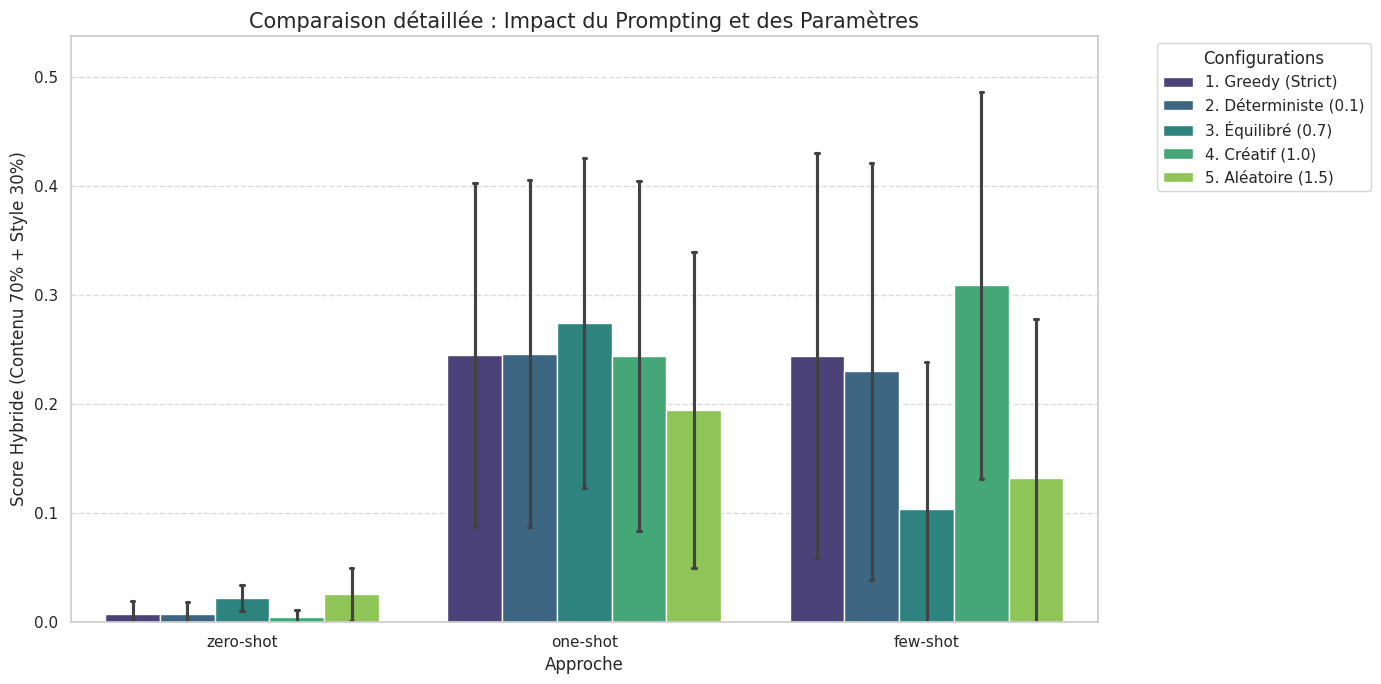

In [ ]:
# Visualisation

import matplotlib.pyplot as plt
import seaborn as sns

def afficher_resultats_finaux(df_results):
	"""
	Génère un tableau récapitulatif, une Heatmap et un Bar Chart 
	pour analyser l'impact du prompting et des hyperparamètres.
	"""
	
	sns.set_theme(style="whitegrid")
	pivot_table = df_results.pivot_table(
		index="Approche", 
		columns="Config", 
		values="Score", 
		aggfunc="mean"
	)

	#HEATMAP
	plt.figure(figsize=(12, 6))
	sns.heatmap(pivot_table, annot=True, fmt=".3f", cmap="YlGnBu", cbar_kws={'label': 'Score Hybride'})
	plt.title("Matrice de Performance : Approche vs Configuration", fontsize=15)
	plt.ylabel("Type de Prompt")
	plt.xlabel("Profil d'Hyperparamètres")
	plt.tight_layout()
	plt.show()

	#BAR CHART
	plt.figure(figsize=(14, 7))
	plot = sns.barplot(
		data=df_results, 
		x="Approche", 
		y="Score", 
		hue="Config", 
		palette="viridis",
		capsize=.05,
		errorbar="sd" #écart-type
	)
	
	plt.title("Comparaison détaillée : Impact du Prompting et des Paramètres", fontsize=15)
	plt.ylim(0, df_results["Score"].max() * 1.2)
	plt.ylabel("Score Hybride (Contenu 70% + Style 30%)")
	plt.legend(title="Configurations", bbox_to_anchor=(1.05, 1), loc='upper left')
	plt.grid(axis='y', linestyle='--', alpha=0.7)
	plt.tight_layout()
	plt.show()

afficher_resultats_finaux(df_final)

Analyse Prompting :

Zero-shot (Score ~0.01) : Échec du formatage. Sans exemple, le modèle ignore la structure imposé dans les exemples

One-shot (Score ~0.24) : Le plus stable. Un seul exemple suffit pour l'imitation du style voulu : balises de gras (**) et séparateur (-)

Few-shot (Score Max 0.31) : Stratégie la efficace (selon le profil des hyper-paramètres). Test réalisés avec 3 exemples. C'est étonnant que le score varie autant selon le profil mais c'est peu-être du au fait que le modèle se perd dans un long prompt ?

Analyse Hyperparamètres :

Greedy & Déterministe (Configs 1 & 2) : Ces modes offrent la plus grande stabilité et une précision constante. C'est le choix de la fiabilité technique.

L'anomalie de la Config 3 (Équilibré) : Étonnamment, cette configuration obtient les meilleurs scores en Zero-shot et One-shot, mais chute lourdement en Few-shot. Cela suggère qu'à ce niveau de température (0.7), le mélange entre "liberté créative" et "contexte long" crée des interférences qui nuisent à la précision.

Le "Sweet Spot" (Config 4 - Temp 1.0) : Le score maximal (0.309) est atteint ici. Une légère liberté de génération semble aider le modèle à mieux structurer des réponses riches et à assimiler les nuances du format "Dictionnaire".

Rupture Thermique (Config 5 - Temp 1.5) : Effondrement total des scores. L'excès de créativité détruit la cohérence logique et brise le formatage Markdown, rendant la réponse inexploitable.